import

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

function


In [ ]:
def predict(df):
  x = df.drop("label", axis = 1)
  y = df["label"]
  x = np.array(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


  svm_model = SVC(kernel='rbf', random_state=42, C=10)
  svm_model.fit(x_train, y_train)

  y_pred = svm_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy*100)
  random_points = []
  max_values = np.max(x_train, axis=0)
  max_f1 = max_values[0]
  max_f2 = max_values[1]

  for i in range(int(max_f1) + 5 ):
      for j in range(int(max_f1) + 5):
          random_points.append({'f1': i, 'f2': j})

  max_values = pd.DataFrame(random_points)

  plt.scatter(x_train[:, 0], x_train[:, 1], c=svm_model.predict(x_train), cmap=plt.cm.coolwarm, s=40)
  plt.scatter(max_values['f1'], max_values['f2'], c=svm_model.predict(max_values[['f1', 'f2']]), cmap=plt.cm.coolwarm, s=10)
  plt.xlabel('f1')
  plt.ylabel('f2')
  plt.show()

##data set1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Aggregation.txt", skiprows=7, delim_whitespace=True, header=None)
df = df.rename(columns={0: 'f1', 1: 'f2', 2: 'label'})
df

,f1,f2,label
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


Accuracy: 98.73417721518987


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


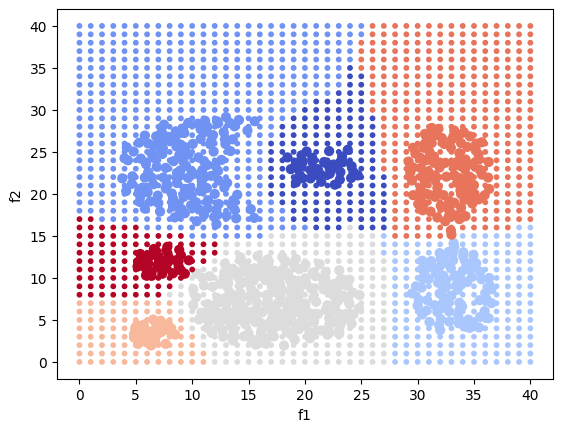

In [ ]:
predict(df)

##data set2

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Compound.txt", skiprows=7, delim_whitespace=True, header=None)
df2 = df.rename(columns={0: 'f1', 1: 'f2', 2: 'label'})
df2

,f1,f2,label
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1
...,...,...,...
394,15.85,9.95,6
395,15.35,9.90,6
396,15.60,9.45,6
397,15.30,9.15,6


Accuracy: 92.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


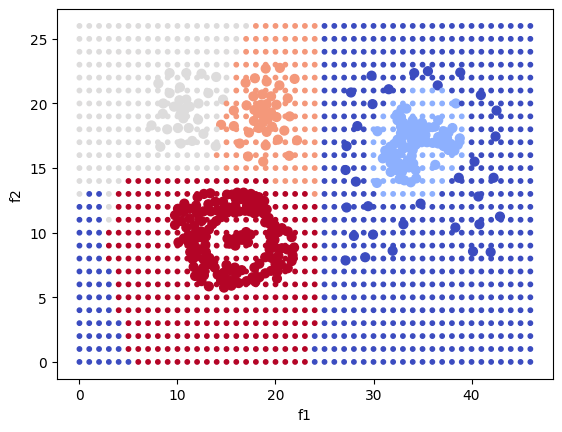

In [ ]:
predict(df2)

# data set 3

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Flame.txt", skiprows=7, delim_whitespace=True, header=None)
df3 = df3.rename(columns={0: 'f1', 1: 'f2', 2: 'label'})
df3

,f1,f2,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2
...,...,...,...
235,7.50,26.20,1
236,7.50,25.65,1
237,7.05,25.85,1
238,6.90,27.15,1


Accuracy: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


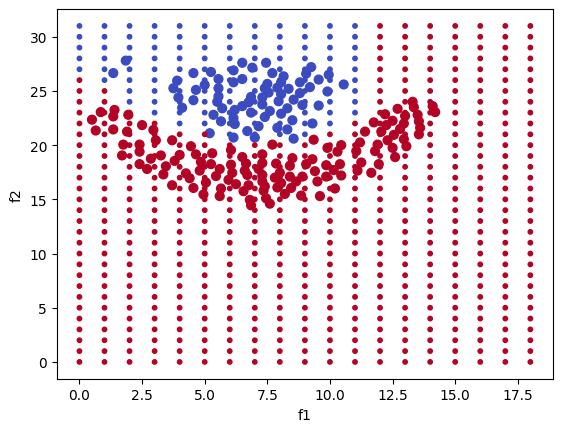

In [ ]:
predict(df3)

# data set 4

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/Jain.txt", skiprows=7, delim_whitespace=True, header=None)
df4 = df4.rename(columns={0: 'f1', 1: 'f2', 2: 'label'})
df4

,f1,f2,label
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


Accuracy: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


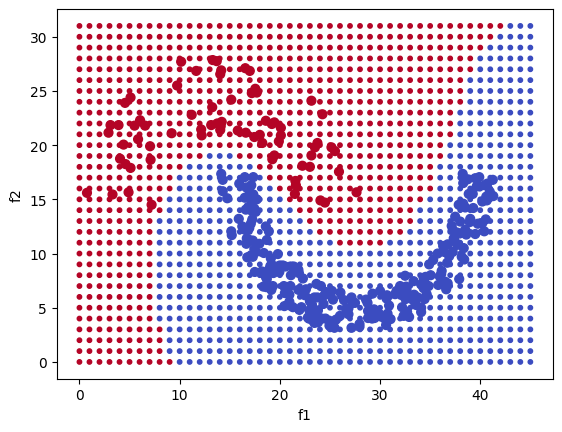

In [ ]:
predict(df4)

# data set 5

In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/Spiral.txt", skiprows=7, delim_whitespace=True, header=None)
df5 = df5.rename(columns={0: 'f1', 1: 'f2', 2: 'label'})
df5

,f1,f2,label
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


Accuracy: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


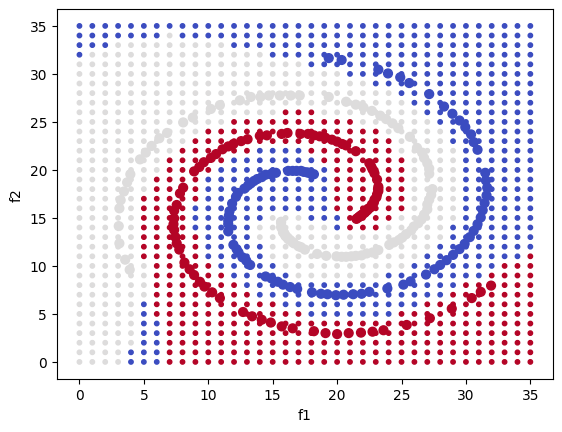

In [ ]:
predict(df5)

# data set 6

In [ ]:
df6 = pd.read_csv("/content/drive/MyDrive/Pathbased.txt", skiprows=7, delim_whitespace=True, header=None)
df6 = df6.rename(columns={0: 'f1', 1: 'f2', 2: 'label'})
df6

,f1,f2,label
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1
...,...,...,...
295,17.50,18.05,2
296,16.65,17.50,2
297,15.45,17.30,2
298,15.45,17.80,2


Accuracy: 98.33333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


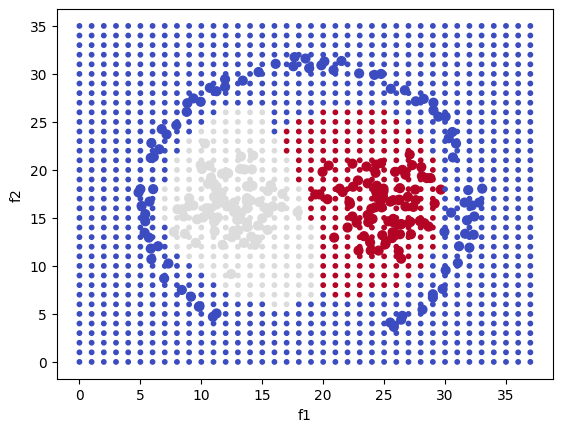

In [ ]:
predict(df6)